In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/COVID_NUMERIC.zip


Archive:  /content/drive/MyDrive/COVID_NUMERIC.zip
  inflating: Covid Data.csv          


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/Covid Data.csv')


In [ ]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [ ]:
df.isnull().sum()

,0
USMER,0
MEDICAL_UNIT,0
SEX,0
PATIENT_TYPE,0
DATE_DIED,0
INTUBED,0
PNEUMONIA,0
AGE,0
PREGNANT,0
DIABETES,0


In [ ]:
num_rows = df.shape[0]
print(f'Number of rows in the DataFrame: {num_rows}')

# Print unique values in the SEX column
unique_sex_values = df['PATIENT_TYPE'].unique()
print("Unique values in the PATIENT column:", unique_sex_values)

Number of rows in the DataFrame: 1048575
Unique values in the PATIENT column: [1 2]


In [ ]:
single_row = df.iloc[0]  # Change the index to print a different row
print(single_row)

USMER                            2
MEDICAL_UNIT                     1
SEX                              1
PATIENT_TYPE                     1
DATE_DIED               03/05/2020
INTUBED                         97
PNEUMONIA                        1
AGE                             65
PREGNANT                         2
DIABETES                         2
COPD                             2
ASTHMA                           2
INMSUPR                          2
HIPERTENSION                     1
OTHER_DISEASE                    2
CARDIOVASCULAR                   2
OBESITY                          2
RENAL_CHRONIC                    2
TOBACCO                          2
CLASIFFICATION_FINAL             3
ICU                             97
Name: 0, dtype: object


In [ ]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
df.loc[df['SEX'] == 2, 'PREGNANT'] = 2

# Optionally, print the updated rows to confirm
updated_rows = df[df['SEX'] == 2]
print("Updated rows where SEX is 2:\n", updated_rows)

# Print unique values in the SEX column
unique_sex_values = df['PREGNANT'].unique()
print("Unique values in the SEX column:", unique_sex_values)

Updated rows where SEX is 2:
          USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
1            2             1    2             1  03/06/2020       97   
2            2             1    2             2  09/06/2020        1   
4            2             1    2             1  21/06/2020       97   
11           2             1    2             2  9999-99-99        2   
12           2             1    2             2  9999-99-99        2   
...        ...           ...  ...           ...         ...      ...   
1048570      2            13    2             1  9999-99-99       97   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
1                1   72         2   

In [ ]:
# Assuming the original DataFrame is named df

# Remove rows where INTUBED or PREGNANT contains 97, 98, or 99
df = df[~df['INTUBED'].isin([97, 98, 99]) & ~df['PREGNANT'].isin([97, 98, 99])]

# Print the number of rows after removal
print("Number of rows after removal:", len(df))

Number of rows after removal: 192377


In [ ]:
# Create a copy of the cleaned DataFrame
df_cleaned_copy = df.copy()  # Assuming df is your original DataFrame

# Replace values in 'DATE_DIED' column using .loc
df_cleaned_copy.loc[:, 'DATE_DIED'] = df_cleaned_copy['DATE_DIED'].apply(lambda x: 2 if x == '9999-99-99' else 1)

# Display the number of rows after changes
print("Number of rows in df_cleaned_copy:", len(df_cleaned_copy))

Number of rows in df_cleaned_copy: 192377


In [ ]:
import pandas as pd
import numpy as np

# Assuming df_cleaned_copy is your DataFrame

# Create a mask to identify columns to clean
columns_to_clean = df_cleaned_copy.columns[df_cleaned_copy.columns != 'AGE']

# Replace 97, 98, 99 with NaN in specified columns
df_cleaned_copy[columns_to_clean] = df_cleaned_copy[columns_to_clean].replace([97, 98, 99], np.nan)

# Optionally, drop rows with any NaN values (if you want to remove those rows)
df_cleaned_copy = df_cleaned_copy.dropna()

# Display the modified DataFrame
print("DataFrame after removing values 97, 98, 99 from all columns except AGE:\n", df_cleaned_copy.head())

# Print the number of rows after cleaning
print("Number of rows after cleaning:", df_cleaned_copy.shape[0])

DataFrame after removing values 97, 98, 99 from all columns except AGE:
     USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE  DATE_DIED  INTUBED  PNEUMONIA  \
2       2             1    2             2          1        1          2   
5       2             1    1             2          2        2          1   
8       2             1    1             2          2        2          2   
9       2             1    1             2          2        2          2   
11      2             1    2             2          2        2          2   

    AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  \
2    55         2       1.0  ...     2.0      2.0           2.0   
5    40         2       2.0  ...     2.0      2.0           2.0   
8    37         2       1.0  ...     2.0      2.0           1.0   
9    25         2       2.0  ...     2.0      2.0           2.0   
11   24         2       2.0  ...     2.0      2.0           2.0   

    OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TO

<ipython-input-16-4e2d09fe8afc>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned_copy[columns_to_clean] = df_cleaned_copy[columns_to_clean].replace([97, 98, 99], np.nan)


In [ ]:
# Dropping the 'PATIENT_TYPE' column from the DataFrame
df_cleaned_copy = df_cleaned_copy.drop(columns=['PATIENT_TYPE'])

# Optionally, print the updated DataFrame to confirm the column is removed
print("Updated DataFrame after dropping 'PATIENT_TYPE':\n", df_cleaned_copy.head())

Updated DataFrame after dropping 'PATIENT_TYPE':
     USMER  MEDICAL_UNIT  SEX  DATE_DIED  INTUBED  PNEUMONIA  AGE  PREGNANT  \
2       2             1    2          1        1          2   55         2   
5       2             1    1          2        2          1   40         2   
8       2             1    1          2        2          2   37         2   
9       2             1    1          2        2          2   25         2   
11      2             1    2          2        2          2   24         2   

    DIABETES  COPD  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
2        1.0   2.0     2.0      2.0           2.0            2.0   
5        2.0   2.0     2.0      2.0           2.0            2.0   
8        1.0   2.0     2.0      2.0           1.0            2.0   
9        2.0   2.0     2.0      2.0           2.0            2.0   
11       2.0   2.0     2.0      2.0           2.0            2.0   

    CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINA

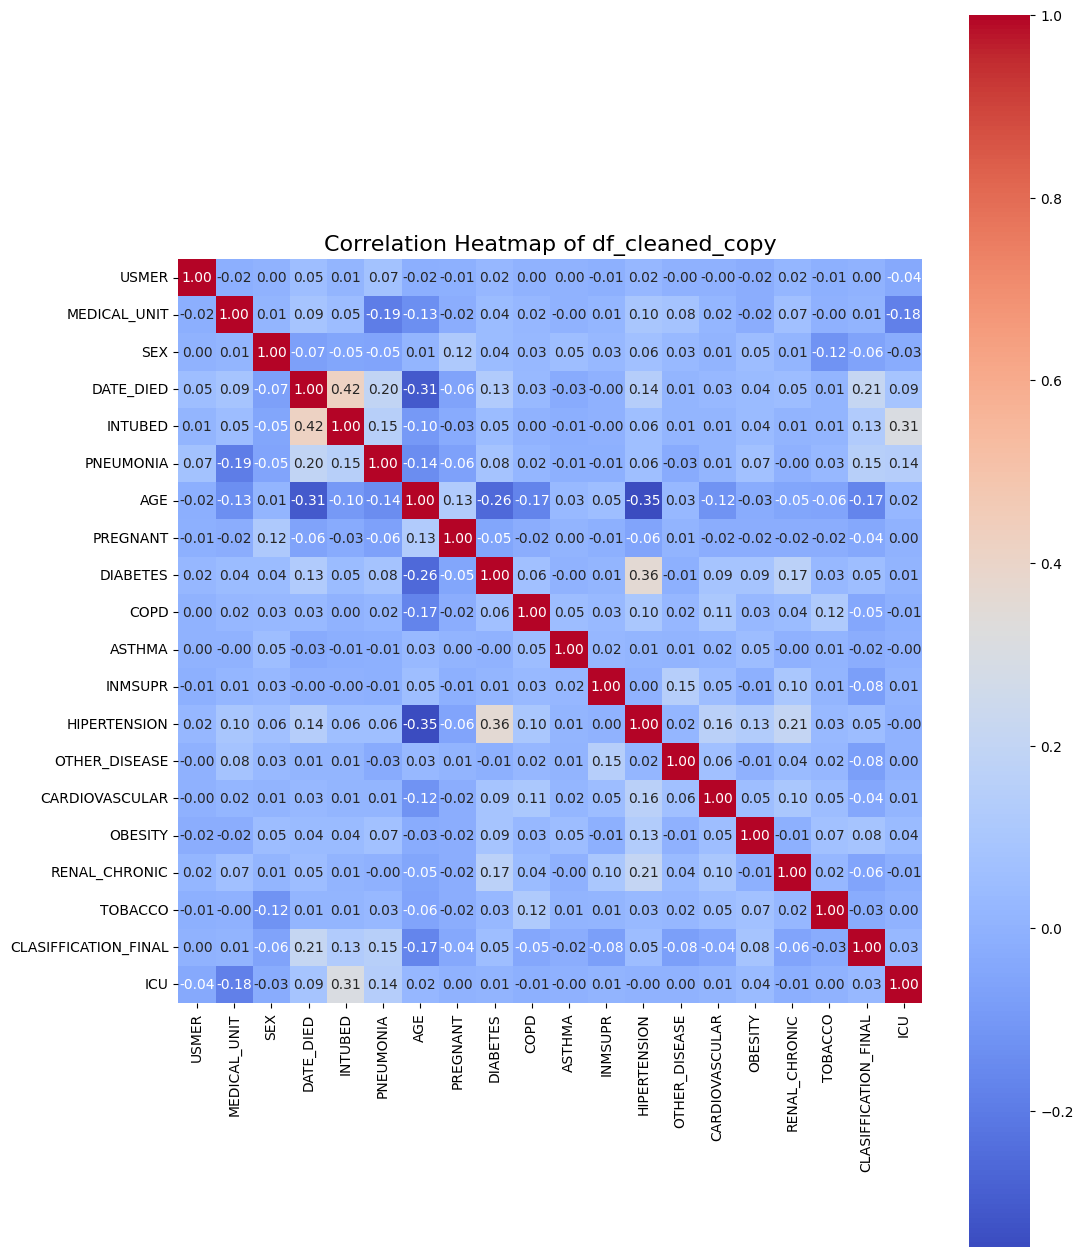

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_cleaned_copy.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 20))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Heatmap of df_cleaned_copy', fontsize=16)
plt.show()

In [ ]:
import pandas as pd

# Assuming df_cleaned_copy is your DataFrame with the target column 'DATE_DIED'
# Count the number of instances for each class
count_class_1 = df_cleaned_copy[df_cleaned_copy['DATE_DIED'] == 1].shape[0]  # Number of deceased patients
count_class_2 = df_cleaned_copy[df_cleaned_copy['DATE_DIED'] == 2].shape[0]  # Number of alive patients

# Print the counts
print(f"Number of deceased patients (1): {count_class_1}")
print(f"Number of alive patients (2): {count_class_2}")

# Downsample the majority class (alive patients) to match the minority class (deceased patients)
df_alive = df_cleaned_copy[df_cleaned_copy['DATE_DIED'] == 2]
df_deceased = df_cleaned_copy[df_cleaned_copy['DATE_DIED'] == 1]

# Randomly sample the same number of alive patients as deceased patients
df_alive_downsampled = df_alive.sample(count_class_1, random_state=42)

# Combine the two classes back together
df_balanced = pd.concat([df_alive_downsampled, df_deceased])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the new class counts
print("\nBalanced dataset class counts:")
print(df_balanced['DATE_DIED'].value_counts())

# Now df_balanced is your balanced dataset


Number of deceased patients (1): 66638
Number of alive patients (2): 122643

Balanced dataset class counts:
DATE_DIED
2    66638
1    66638
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler # Import the StandardScaler class

standard_scaler = StandardScaler()
df['AGE'] = standard_scaler.fit_transform(df.loc[:,['AGE']])

In [ ]:
y = df['DATE_DIED']
x = df.drop('DATE_DIED', axis=1)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)

print('Train_X', train_x.shape)
print('Test_X', test_x.shape)
print('Train_Y', train_y.shape)
print('Test_Y', test_y.shape)

Train_X (153901, 20)
Test_X (38476, 20)
Train_Y (153901,)
Test_Y (38476,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Create a copy of the cleaned DataFrame
df_cleaned_copy = df.copy()  # Assuming df is your original DataFrame

# Replace values in 'DATE_DIED' column using .loc
df_cleaned_copy.loc[:, 'DATE_DIED'] = df_cleaned_copy['DATE_DIED'].apply(lambda x: 2 if x == '9999-99-99' else 1)

# Display the number of rows after changes
print("Number of rows in df_cleaned_copy:", len(df_cleaned_copy))

Number of rows in df_cleaned_copy: 192377


Visualizations

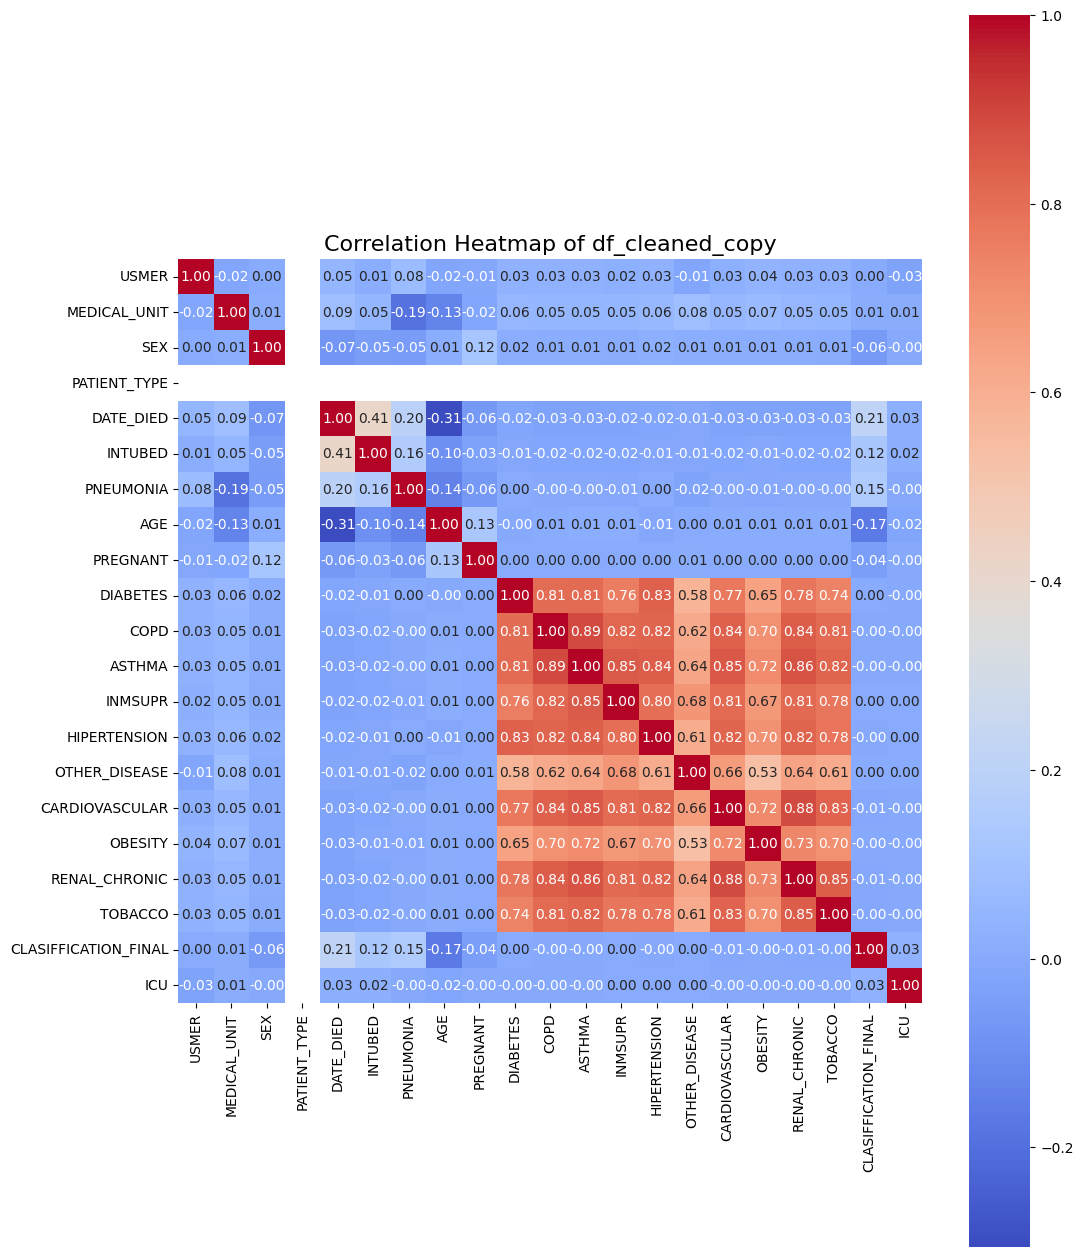

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_cleaned_copy.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 20))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Heatmap of df_cleaned_copy', fontsize=16)
plt.show()


Outlier Detection and Removal

In [ ]:
def remove_outliers_iqr(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data



In [ ]:

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Remove outliers
df_cleaned = remove_outliers_iqr(df, numeric_columns)

print(f"Original shape: {df.shape}")
print(f"Shape after removing outliers: {df_cleaned.shape}")

Original shape: (192377, 21)
Shape after removing outliers: (84851, 21)


Step 4: Boxplot for Outlier Visualization

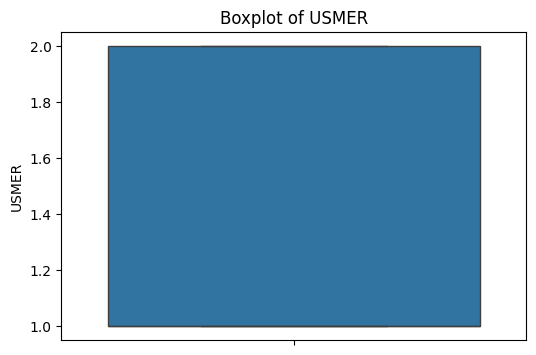

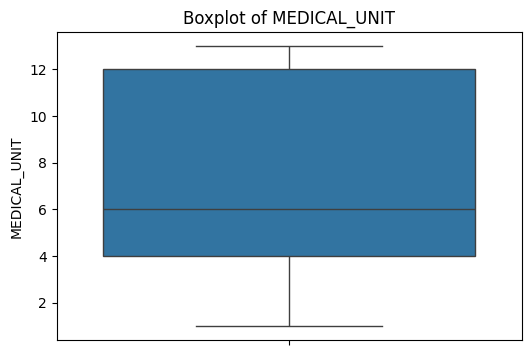

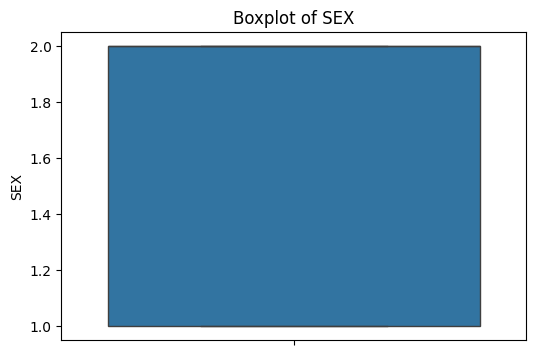

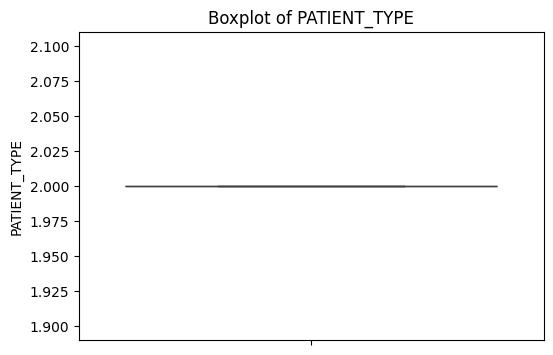

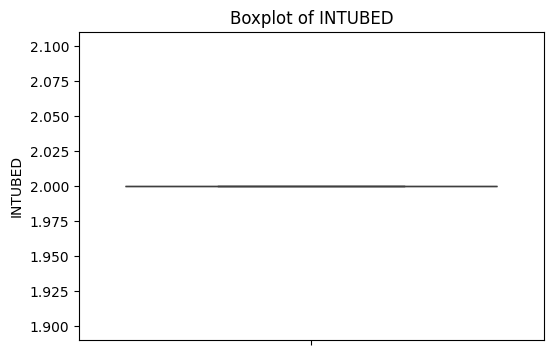

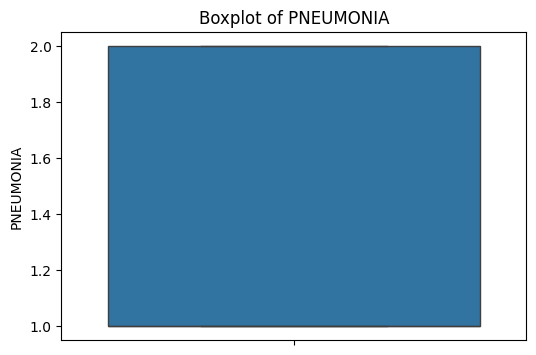

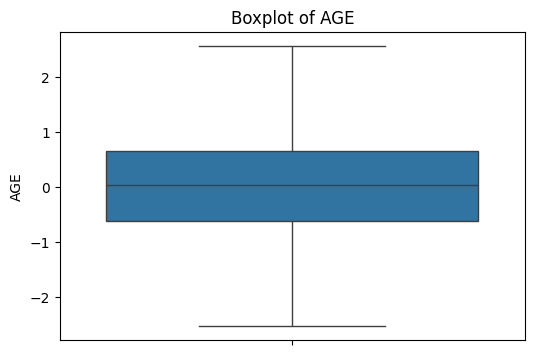

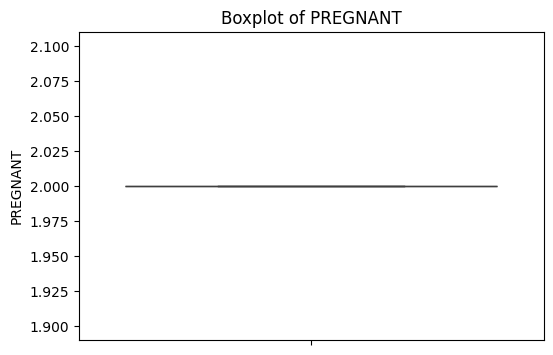

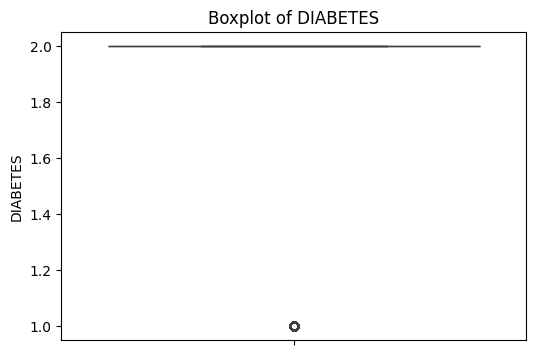

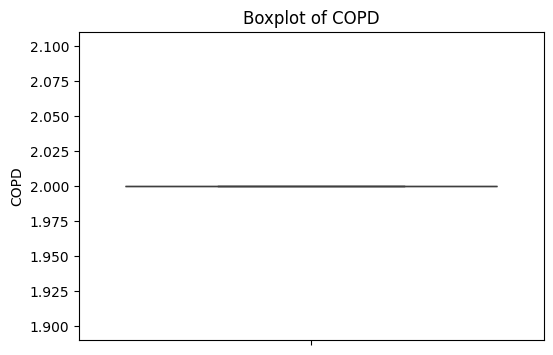

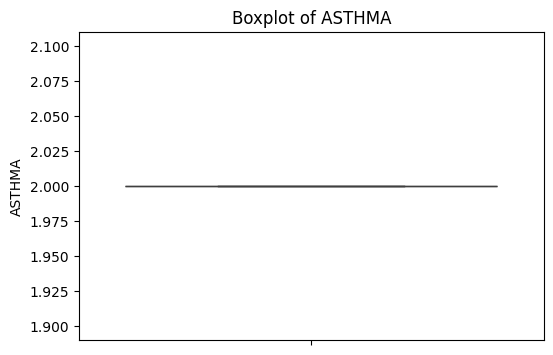

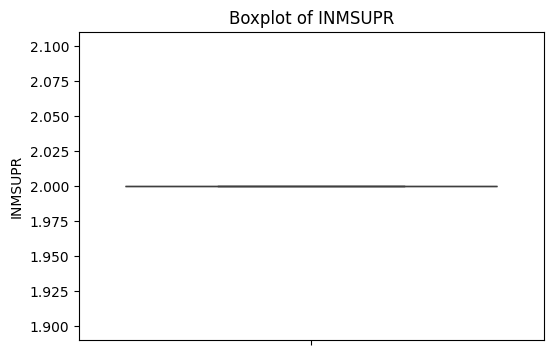

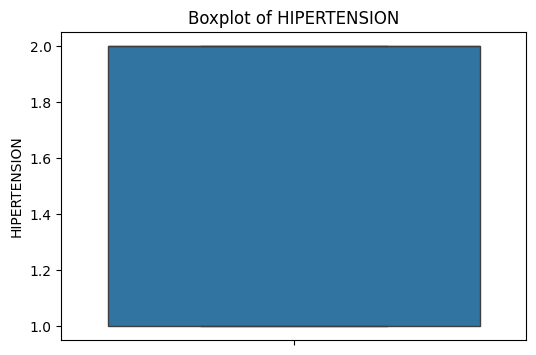

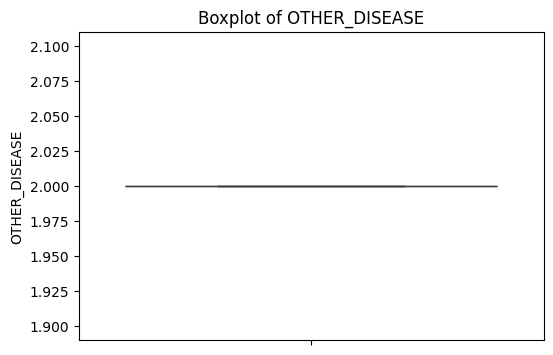

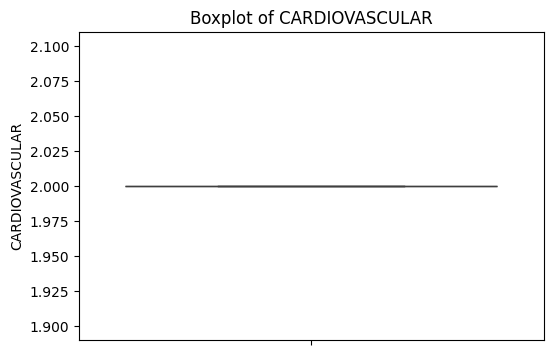

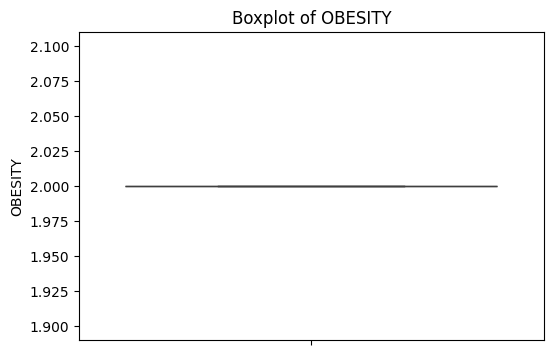

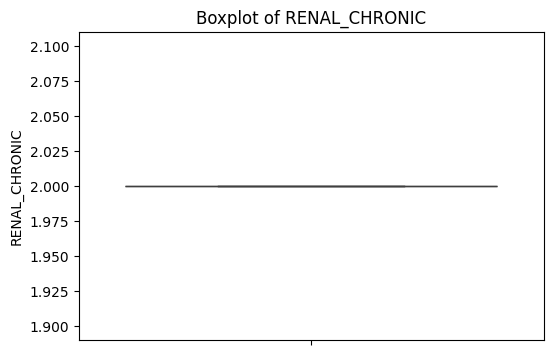

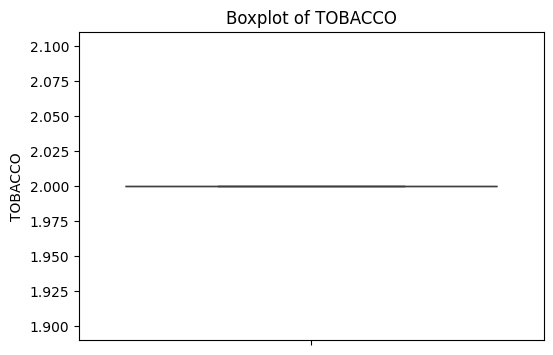

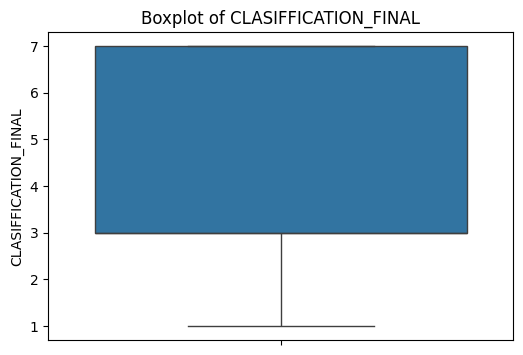

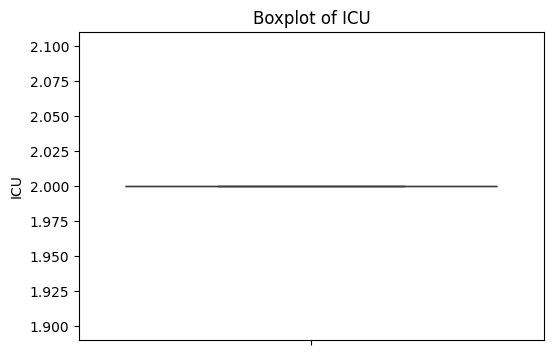

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


Finding Skewness and Kurtosis

In [ ]:
from scipy.stats import kurtosis

numerical_columns = df_cleaned_copy.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)

for column in numerical_columns:
    print(f"Column: {column}")
    print(f"  Unique values: {df_cleaned_copy[column].unique()}")
    print(f"  Min: {df_cleaned_copy[column].min()}, Max: {df_cleaned_copy[column].max()}")
    print(f"  Mean: {df_cleaned_copy[column].mean()}, Std: {df_cleaned_copy[column].std()}")
    print(f"  Skewness: {df_cleaned_copy[column].skew()}")
    print(f"  Kurtosis: {kurtosis(df_cleaned_copy[column], fisher=True)}")  # Fisher's Kurtosis (subtracts 3)
    print("-" * 40)


Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')
Column: USMER
  Unique values: [2 1]
  Min: 1, Max: 2
  Mean: 1.4538432348981427, Std: 0.49786628877618616
  Skewness: 0.18542024637885093
  Kurtosis: -1.9656198683770683
----------------------------------------
Column: MEDICAL_UNIT
  Unique values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
  Min: 1, Max: 13
  Mean: 7.364950071994054, Std: 3.6825041798343903
  Skewness: 0.31528339702270947
  Kurtosis: -1.7514278275045745
----------------------------------------
Column: SEX
  Unique values: [2 1]
  Min: 1, Max: 2
  Mean: 1.5949931644635273, Std: 0.49089464382644377
  Skewness: -0.38702460188366217
  Kurtosis: -1.8502142933843675
----------------------------------------
Column: PATIENT_TYPE

<ipython-input-31-1e463ce4e3d3>:12: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print(f"  Kurtosis: {kurtosis(df_cleaned_copy[column], fisher=True)}")  # Fisher's Kurtosis (subtracts 3)


In [ ]:
from scipy.stats import skew, kurtosis

print("Skewness and Kurtosis:")
for column in numeric_columns:
    skewness = skew(df_cleaned[column])
    kurt = kurtosis(df_cleaned[column])
    print(f'{column} - Skewness: {skewness:.2f}, Kurtosis: {kurt:.2f}')


Skewness and Kurtosis:
USMER - Skewness: 0.20, Kurtosis: -1.96
MEDICAL_UNIT - Skewness: 0.30, Kurtosis: -1.76
SEX - Skewness: -0.40, Kurtosis: -1.84
PATIENT_TYPE - Skewness: nan, Kurtosis: nan
INTUBED - Skewness: nan, Kurtosis: nan
PNEUMONIA - Skewness: 0.20, Kurtosis: -1.96
AGE - Skewness: -0.24, Kurtosis: -0.18
PREGNANT - Skewness: nan, Kurtosis: nan
DIABETES - Skewness: -1.19, Kurtosis: -0.59
COPD - Skewness: nan, Kurtosis: nan
ASTHMA - Skewness: nan, Kurtosis: nan
INMSUPR - Skewness: nan, Kurtosis: nan
HIPERTENSION - Skewness: -1.14, Kurtosis: -0.70
OTHER_DISEASE - Skewness: nan, Kurtosis: nan
CARDIOVASCULAR - Skewness: nan, Kurtosis: nan
OBESITY - Skewness: nan, Kurtosis: nan
RENAL_CHRONIC - Skewness: nan, Kurtosis: nan
TOBACCO - Skewness: nan, Kurtosis: nan
CLASIFFICATION_FINAL - Skewness: 0.33, Kurtosis: -1.64
ICU - Skewness: nan, Kurtosis: nan


<ipython-input-32-c6f7cdf4cf3e>:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(df_cleaned[column])
<ipython-input-32-c6f7cdf4cf3e>:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(df_cleaned[column])


Model Training & Comparison

In [ ]:
# Drop target variable
X = df_cleaned_copy.drop(columns=['DATE_DIED'])
y = df_cleaned_copy['DATE_DIED']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
print("Unique classes in y_train:", np.unique(y_train))


Unique classes in y_train: [1 2]


In [ ]:
from collections import Counter
print("Class distribution in y_train:", Counter(y_train))


Class distribution in y_train: Counter({2: 99520, 1: 54381})


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [ ]:
print(np.unique(y, return_counts=True))


(array([1, 2], dtype=object), array([ 67924, 124453]))


In [ ]:
print(np.unique(y_train))


[1 2]


In [ ]:
import numpy as np
print(np.unique(y, return_counts=True))  # Check label distribution


(array([1, 2], dtype=object), array([ 67924, 124453]))


In [ ]:
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.7, random_state=42)


In [ ]:
svm_model = SVC(kernel='linear', C=1.0)


In [ ]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)


In [ ]:
print(df_cleaned_copy["DATE_DIED"].nunique())  # Check number of unique values
print(df_cleaned_copy["DATE_DIED"].value_counts())  # See the distribution


2
DATE_DIED
2    124453
1     67924
Name: count, dtype: int64


In [ ]:
df_cleaned_copy["DATE_DIED"] = pd.cut(df_cleaned_copy["DATE_DIED"], bins=3, labels=[0, 1, 2], duplicates="drop")


In [ ]:
df_cleaned_copy["DATE_DIED"] = df_cleaned_copy["DATE_DIED"].notna().astype(int)  # 1 if died, 0 if not


In [ ]:
print(df_cleaned_copy["DATE_DIED"].value_counts())


DATE_DIED
1    192377
Name: count, dtype: int64


In [ ]:
y = df_cleaned_copy["ICU"].astype(str)  # Convert numbers to strings
# or
y = df_cleaned_copy["ICU"].astype("category").cat.codes  # Convert to integer labels


In [ ]:
print(y.unique())  # See if it's continuous or categorical


[1 0 2]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Reduce dataset size to prevent RAM overload
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, test_size=0.7, random_state=42)

# Models with optimized parameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "SVM": SVC(kernel='linear', C=1.0)
}

# Dictionary to store results
results = {}

# Train and evaluate each model separately
for name, model in models.items():
    print(f"\n🔹 Training {name}...")

    # Train model
    model.fit(X_train_sample, y_train_sample)

    # Predict
    y_pred = model.predict(X_test)

    # Store results
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred)
    }

    # Print results
    print(f"✅ {name} Training Complete!")
    print(f"Accuracy: {results[name]['Accuracy']:.4f}")
    print("Confusion Matrix:\n", results[name]["Confusion Matrix"])
    print("Classification Report:\n", results[name]["Classification Report"])



🔹 Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Logistic Regression Training Complete!
Accuracy: 0.9125
Confusion Matrix:
 [[  436  2902     0]
 [  428 34675     1]
 [    1    33     0]]
Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.13      0.21      3338
           2       0.92      0.99      0.95     35104
          99       0.00      0.00      0.00        34

    accuracy                           0.91     38476
   macro avg       0.48      0.37      0.39     38476
weighted avg       0.88      0.91      0.89     38476


🔹 Training Random Forest...
✅ Random Forest Training Complete!
Accuracy: 0.9103
Confusion Matrix:
 [[  984  2351     3]
 [ 1052 34042    10]
 [    4    30     0]]
Classification Report:
               precision    recall  f1-score   support

           1       0.48      0.29      0.37      3338
           2       0.93      0.97      0.95     35104
          99       0.00      0.00      0.00        34

    accuracy                           0.91     

In [ ]:
pip install xgboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # XGBoost
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd

# Assuming df_cleaned_copy is your cleaned dataset

# Define target variable
TARGET_COLUMN = "ICU"  # Make sure this is the correct column
X = df_cleaned_copy.drop(columns=[TARGET_COLUMN])
y = df_cleaned_copy[TARGET_COLUMN]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize only for Logistic Regression and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
### **1. Logistic Regression**
print("\n==== Logistic Regression ====")
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))



==== Logistic Regression ====
Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.14      0.22      3338
           2       0.92      0.99      0.95     35104
          99       0.00      0.00      0.00        34

    accuracy                           0.91     38476
   macro avg       0.47      0.38      0.39     38476
weighted avg       0.89      0.91      0.89     38476

Accuracy: 0.9123349620542676
Confusion Matrix:
[[  471  2867     0]
 [  471 34632     1]
 [    1    33     0]]


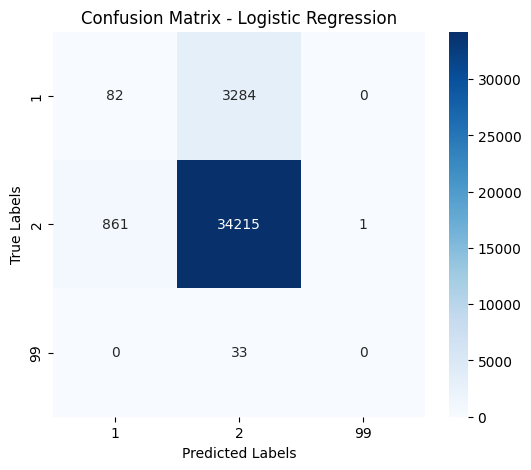

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
### **2. Random Forest**
print("\n==== Random Forest ====")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))



==== Random Forest ====
Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.31      0.38      3338
           2       0.94      0.97      0.95     35104
          99       0.00      0.00      0.00        34

    accuracy                           0.91     38476
   macro avg       0.48      0.43      0.44     38476
weighted avg       0.90      0.91      0.90     38476

Accuracy: 0.9122569913712444
Confusion Matrix:
[[ 1033  2304     1]
 [ 1031 34067     6]
 [    5    29     0]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("\n==== Gradient Boosting ====")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))



==== Gradient Boosting ====
Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.27      0.38      3366
           2       0.93      0.98      0.96     35077
          99       0.00      0.00      0.00        33

    accuracy                           0.92     38476
   macro avg       0.52      0.42      0.45     38476
weighted avg       0.91      0.92      0.91     38476

Accuracy: 0.921587483106352
Confusion Matrix:
[[  915  2451     0]
 [  533 34544     0]
 [    4    29     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


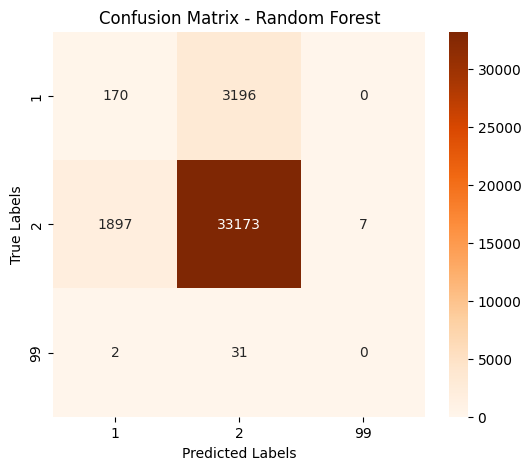

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Random Forest")
plt.show()


==== Gradient Boosting ====
Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.27      0.38      3366
           2       0.93      0.98      0.96     35077
          99       0.00      0.00      0.00        33

    accuracy                           0.92     38476
   macro avg       0.52      0.42      0.45     38476
weighted avg       0.91      0.92      0.91     38476

Accuracy: 0.921587483106352


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


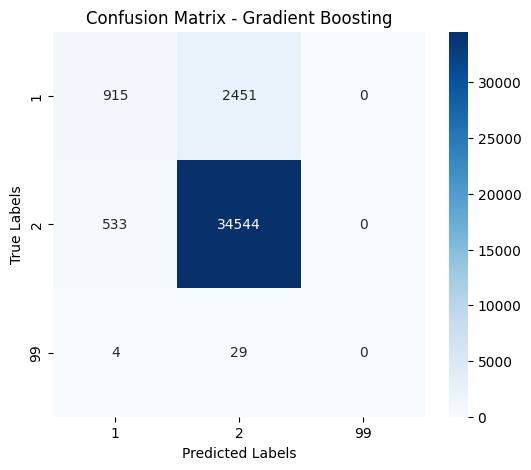

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Classifier
print("\n==== Gradient Boosting ====")
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Compute confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Print classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


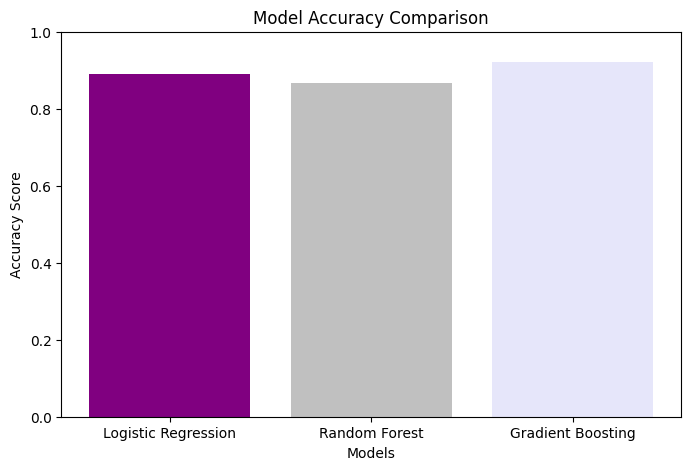

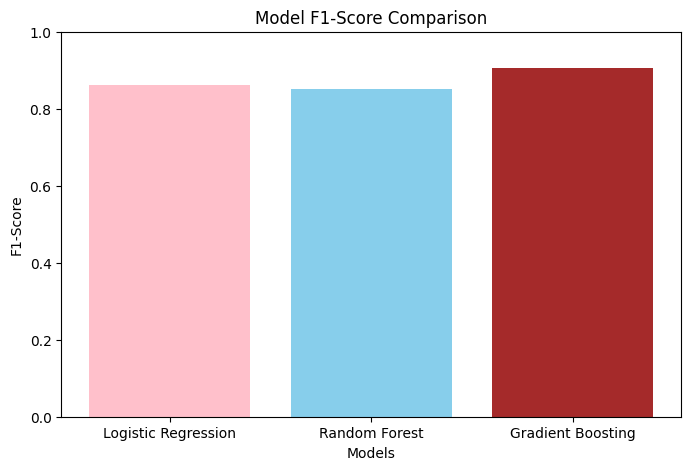

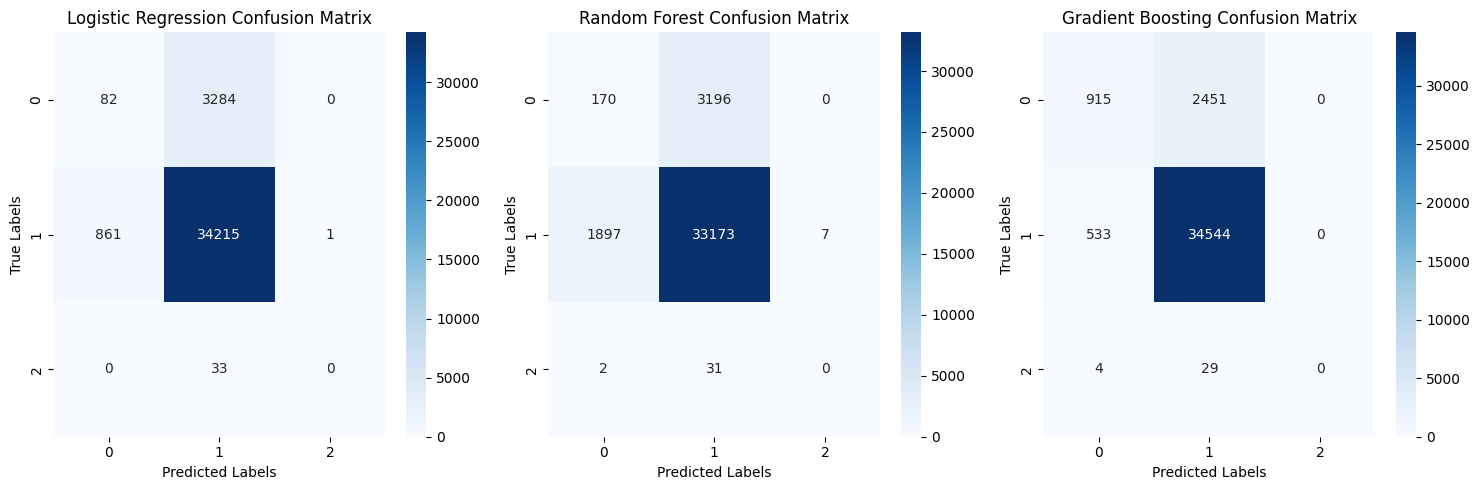

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score

# Store model names and predictions
models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb
}

# Compute accuracy and F1-score for each model
accuracies = {name: accuracy_score(y_test, preds) for name, preds in models.items()}
f1_scores = {name: f1_score(y_test, preds, average='weighted') for name, preds in models.items()}

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['purple', 'silver', 'lavender'])
plt.ylim(0, 1)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.show()

# Plot F1-Score Comparison
plt.figure(figsize=(8, 5))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['pink', 'skyblue', 'brown'])
plt.ylim(0, 1)
plt.xlabel("Models")
plt.ylabel("F1-Score")
plt.title("Model F1-Score Comparison")
plt.show()

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (name, preds) in enumerate(models.items()):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted Labels")
    axes[i].set_ylabel("True Labels")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


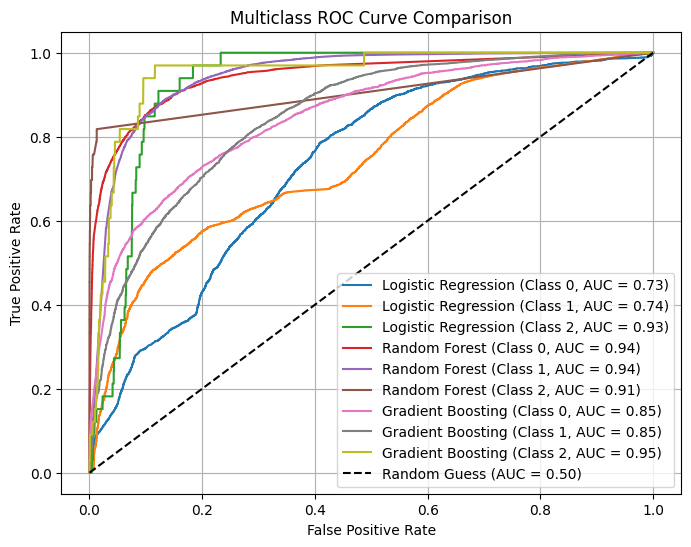

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output labels
n_classes = len(np.unique(y_test))
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Dictionary of models
models = {
    "Logistic Regression": lr_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model
}

plt.figure(figsize=(8, 6))

# Plot ROC curve for each model
for name, model in models.items():
    if hasattr(model, "predict_proba"):  # Ensure the model supports probability predictions
        y_prob = model.predict_proba(X_test)
        for i in range(n_classes):  # Plot ROC for each class
            fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{name} (Class {i}, AUC = {roc_auc:.2f})")

# Plot diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")

# Labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()
